# Setting 

## libraries 

In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
plt.rcParams['font.family'] = 'Malgun Gothic'
import seaborn as sns 

import warnings 
warnings.filterwarnings('ignore')

## load datasets 

In [4]:
train_df = pd.read_csv('dataset/train.csv')
test_df = pd.read_csv('dataset/test.csv')
census_df = pd.read_csv('dataset/census_starter.csv')

In [13]:
def null_cols(df) : 
    missing_cols = [col for col in df.columns if df[col].isnull().any()]
    print(f'# of missing cols : {len(missing_cols)} and missing cols are {missing_cols}')

In [14]:
null_cols(train_df)
null_cols(test_df)

# of missing cols : 0 and missing cols are []
# of missing cols : 0 and missing cols are []


# EDA

## year/month

In [18]:
train_df.head()

,row_id,cfips,county,state,first_day_of_month,microbusiness_density,active
0,1001_2019-08-01,1001,Autauga County,Alabama,2019-08-01,3.007682,1249
1,1001_2019-09-01,1001,Autauga County,Alabama,2019-09-01,2.884870,1198
2,1001_2019-10-01,1001,Autauga County,Alabama,2019-10-01,3.055843,1269
3,1001_2019-11-01,1001,Autauga County,Alabama,2019-11-01,2.993233,1243
4,1001_2019-12-01,1001,Autauga County,Alabama,2019-12-01,2.993233,1243


In [19]:
# train : 2019/08 ~ 2022/10
train_df['first_day_of_month'].unique()

array(['2019-08-01', '2019-09-01', '2019-10-01', '2019-11-01',
       '2019-12-01', '2020-01-01', '2020-02-01', '2020-03-01',
       '2020-04-01', '2020-05-01', '2020-06-01', '2020-07-01',
       '2020-08-01', '2020-09-01', '2020-10-01', '2020-11-01',
       '2020-12-01', '2021-01-01', '2021-02-01', '2021-03-01',
       '2021-04-01', '2021-05-01', '2021-06-01', '2021-07-01',
       '2021-08-01', '2021-09-01', '2021-10-01', '2021-11-01',
       '2021-12-01', '2022-01-01', '2022-02-01', '2022-03-01',
       '2022-04-01', '2022-05-01', '2022-06-01', '2022-07-01',
       '2022-08-01', '2022-09-01', '2022-10-01'], dtype=object)

In [22]:
# test : 2022/11 ~ 2023/06
test_df['first_day_of_month'].unique()

array(['2022-11-01', '2022-12-01', '2023-01-01', '2023-02-01',
       '2023-03-01', '2023-04-01', '2023-05-01', '2023-06-01'],
      dtype=object)

In [34]:
for dt in [train_df, test_df] : 
    dt['year'] = dt['first_day_of_month'].str.split('-', expand = True).iloc[:, 0]
    dt['month'] = dt['first_day_of_month'].str.split('-', expand = True).iloc[:, 1]
    dt['year/month'] = dt['year'] + dt['month']
    dt['year'] = dt['year'].astype('int')
    dt['month'] = dt['month'].astype('int')
train_df.describe()

,cfips,microbusiness_density,active,year,month
count,122265.000000,122265.000000,1.222650e+05,122265.000000,122265.000000
mean,30376.037640,3.817671,6.442858e+03,2020.692308,6.692308
std,15143.508721,4.991087,3.304001e+04,0.991089,3.390452
min,1001.000000,0.000000,0.000000e+00,2019.000000,1.000000
25%,18177.000000,1.639344,1.450000e+02,2020.000000,4.000000
50%,29173.000000,2.586543,4.880000e+02,2021.000000,7.000000
75%,45077.000000,4.519231,2.124000e+03,2022.000000,10.000000
max,56045.000000,284.340030,1.167744e+06,2022.000000,12.000000


In [35]:
train_df.head()

,row_id,cfips,county,state,first_day_of_month,microbusiness_density,active,year,month,year/month
0,1001_2019-08-01,1001,Autauga County,Alabama,2019-08-01,3.007682,1249,2019,8,201908
1,1001_2019-09-01,1001,Autauga County,Alabama,2019-09-01,2.884870,1198,2019,9,201909
2,1001_2019-10-01,1001,Autauga County,Alabama,2019-10-01,3.055843,1269,2019,10,201910
3,1001_2019-11-01,1001,Autauga County,Alabama,2019-11-01,2.993233,1243,2019,11,201911
4,1001_2019-12-01,1001,Autauga County,Alabama,2019-12-01,2.993233,1243,2019,12,201912


In [49]:
train_df.groupby('year').mean()

,cfips,microbusiness_density,active,month
year,,,,
2019,30376.03764,3.732905,6274.823604,10.0
2020,30376.03764,3.722057,6350.289500,6.5
2021,30376.03764,3.841160,6408.619511,6.5
2022,30376.03764,3.946603,6679.044434,5.5


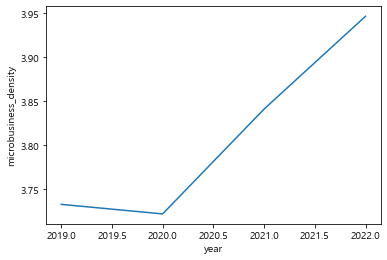

In [47]:
plt.figure()
sns.lineplot(data=train_df.groupby('year').mean(),x='year',y='microbusiness_density')
plt.show()

**연도별/월별 microbusiness density & active**

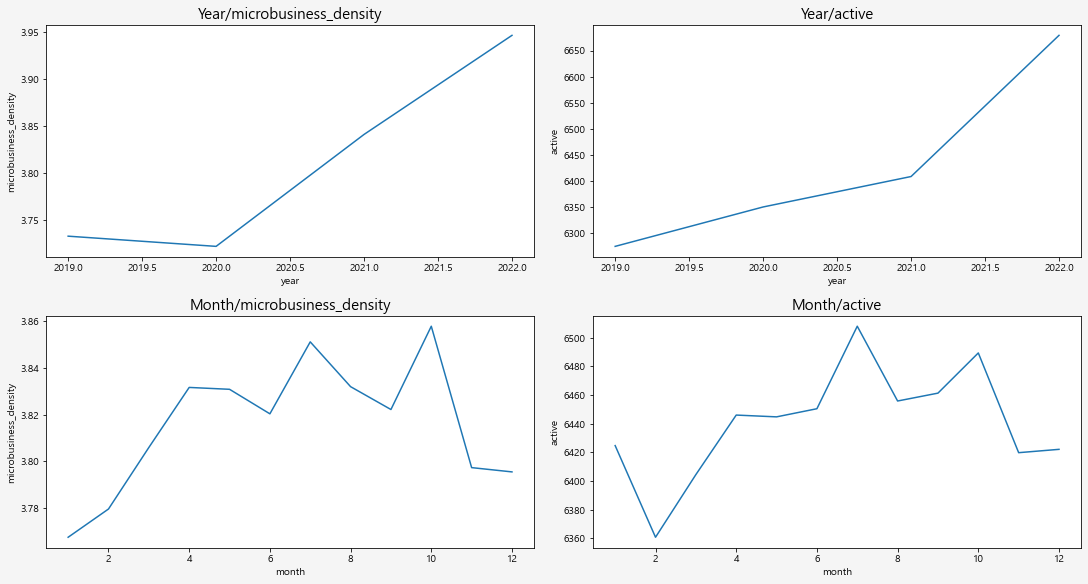

In [74]:
fig, ax = plt.subplots(2, 2, figsize=(15,8), 
                       facecolor='whitesmoke', constrained_layout=True)
# 연도별 
sns.lineplot(data = train_df.groupby('year').mean(), 
             x = 'year', y = 'microbusiness_density', ax = ax[0, 0])
ax[0, 0].set_title('Year/microbusiness_density', fontsize = 15)
sns.lineplot(data = train_df.groupby('year').mean(), 
             x = 'year', y = 'active', ax = ax[0, 1])
ax[0, 1].set_title('Year/active', fontsize = 15)
# 월별
sns.lineplot(data = train_df.groupby('month').mean(), 
             x = 'month', y = 'microbusiness_density', ax = ax[1, 0])
ax[1, 0].set_title('Month/microbusiness_density', fontsize = 15)
sns.lineplot(data = train_df.groupby('month').mean(), 
             x = 'month', y = 'active', ax = ax[1, 1])
ax[1, 1].set_title('Month/active', fontsize = 15)

plt.show()

**microbusiness_density의 추이**

In [60]:
train_df

,row_id,cfips,county,state,first_day_of_month,microbusiness_density,active,year,month,year/month
0,1001_2019-08-01,1001,Autauga County,Alabama,2019-08-01,3.007682,1249,2019,8,201908
1,1001_2019-09-01,1001,Autauga County,Alabama,2019-09-01,2.884870,1198,2019,9,201909
2,1001_2019-10-01,1001,Autauga County,Alabama,2019-10-01,3.055843,1269,2019,10,201910
3,1001_2019-11-01,1001,Autauga County,Alabama,2019-11-01,2.993233,1243,2019,11,201911
4,1001_2019-12-01,1001,Autauga County,Alabama,2019-12-01,2.993233,1243,2019,12,201912
...,...,...,...,...,...,...,...,...,...,...
122260,56045_2022-06-01,56045,Weston County,Wyoming,2022-06-01,1.803249,101,2022,6,202206
122261,56045_2022-07-01,56045,Weston County,Wyoming,2022-07-01,1.803249,101,2022,7,202207
122262,56045_2022-08-01,56045,Weston County,Wyoming,2022-08-01,1.785395,100,2022,8,202208
122263,56045_2022-09-01,56045,Weston County,Wyoming,2022-09-01,1.785395,100,2022,9,202209


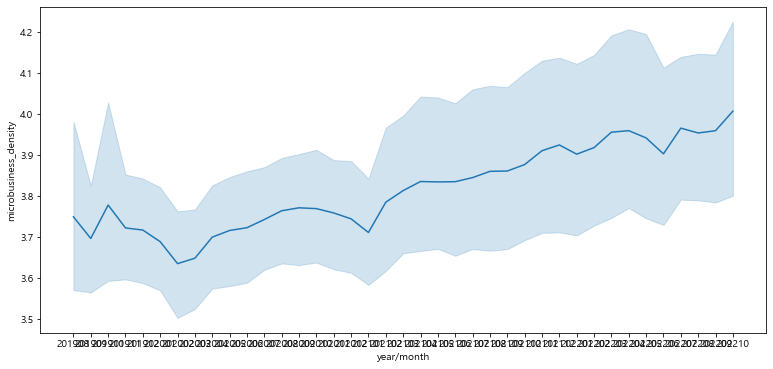

In [65]:
plt.figure(figsize = (13, 6)) 
sns.lineplot(x = 'year/month', y = 'microbusiness_density', data = train_df)
locs, labels = plt.xticks()
plt.show()

전체 데이터를 보면 전반적으로 증가하는 추세임을 알 수 있음 

## state

In [68]:
sort_std=train_df.groupby(['state']).describe()['microbusiness_density'].sort_values('std').index
each_state=train_df.groupby(['state']).describe()['microbusiness_density'].sort_values('std')
each_state

,count,mean,std,min,25%,50%,75%,max
state,,,,,,,,
District of Columbia,39.0,13.508989,0.294487,12.787801,13.269190,13.551914,13.697423,14.005946
Rhode Island,195.0,6.985363,1.207692,4.969075,6.032383,7.264053,8.120277,8.660382
West Virginia,2145.0,1.855457,1.241438,0.360211,0.878539,1.453722,2.542662,7.043378
Arkansas,2925.0,1.998925,1.497099,0.247328,0.974982,1.531890,2.445632,16.291933
Kansas,4095.0,2.463091,1.532490,0.562430,1.576070,2.148502,2.800141,14.035515
Mississippi,3198.0,1.696296,1.539697,0.000000,0.863192,1.305429,1.952426,14.852497
Alabama,2613.0,2.223274,1.584220,0.438305,1.202177,1.639288,2.709124,8.573463
Kentucky,4680.0,2.077160,1.731339,0.224027,0.953756,1.593625,2.662017,14.448168
Ohio,3432.0,3.034945,1.765796,0.637639,1.686132,2.482716,3.726996,9.845983


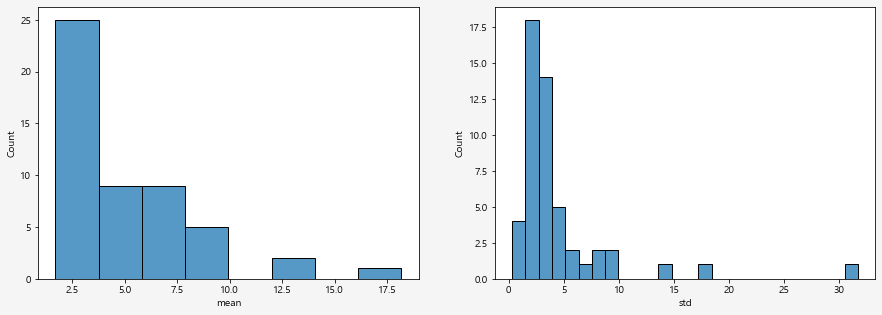

In [75]:
fig, ax = plt.subplots(1, 2, figsize = (15, 5), facecolor = 'whitesmoke')
sns.histplot(x = 'mean', data = each_state, ax = ax[0])
sns.histplot(x = 'std', data = each_state, ax = ax[1])
plt.show()

### 분산이 낮은 state의 추이

In [82]:
train_df[train_df['state'].isin(sort_std[:5])]

,row_id,cfips,county,state,first_day_of_month,microbusiness_density,active,year,month,year/month
4251,5001_2019-08-01,5001,Arkansas County,Arkansas,2019-08-01,1.552795,220,2019,8,201908
4252,5001_2019-09-01,5001,Arkansas County,Arkansas,2019-09-01,1.552795,220,2019,9,201909
4253,5001_2019-10-01,5001,Arkansas County,Arkansas,2019-10-01,1.496330,212,2019,10,201910
4254,5001_2019-11-01,5001,Arkansas County,Arkansas,2019-11-01,1.461039,207,2019,11,201911
4255,5001_2019-12-01,5001,Arkansas County,Arkansas,2019-12-01,1.418690,201,2019,12,201912
...,...,...,...,...,...,...,...,...,...,...
118555,54109_2022-06-01,54109,Wyoming County,West Virginia,2022-06-01,0.434258,72,2022,6,202206
118556,54109_2022-07-01,54109,Wyoming County,West Virginia,2022-07-01,0.440290,73,2022,7,202207
118557,54109_2022-08-01,54109,Wyoming County,West Virginia,2022-08-01,0.434258,72,2022,8,202208
118558,54109_2022-09-01,54109,Wyoming County,West Virginia,2022-09-01,0.434258,72,2022,9,202209


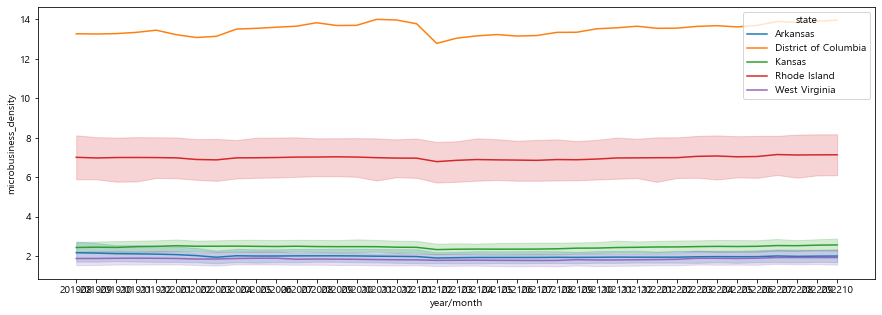

In [83]:
plt.figure(figsize = (15, 5))
sns.lineplot(x = 'year/month', y = 'microbusiness_density', 
             data = train_df[train_df['state'].isin(sort_std[:5])],
             hue = 'state')
plt.show()


District of Columbia는 county가 1개이며, 값이 크기 때문에 제외하고 plot 출력

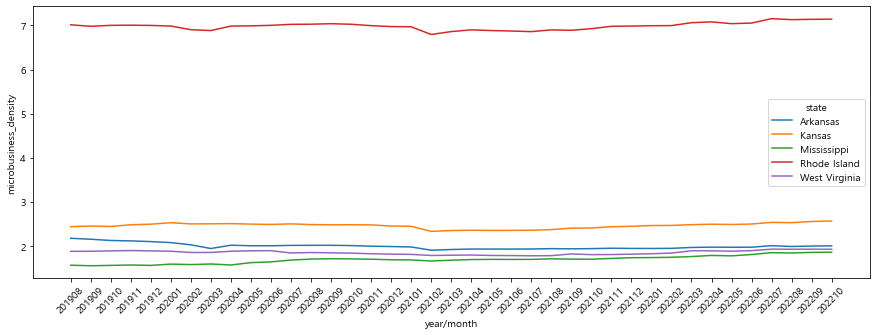

In [92]:
plt.figure(figsize = (15, 5))
sns.lineplot(x = 'year/month', y = 'microbusiness_density', 
             data = train_df[train_df['state'].isin(sort_std[1:6])],
             hue = 'state', ci = None)
locs, labels = plt.xticks()
plt.setp(labels, rotation = 45)
plt.show()


In [96]:
sort_std[-5:-1]

Index(['South Dakota', 'Colorado', 'Delaware', 'Wyoming'], dtype='object', name='state')

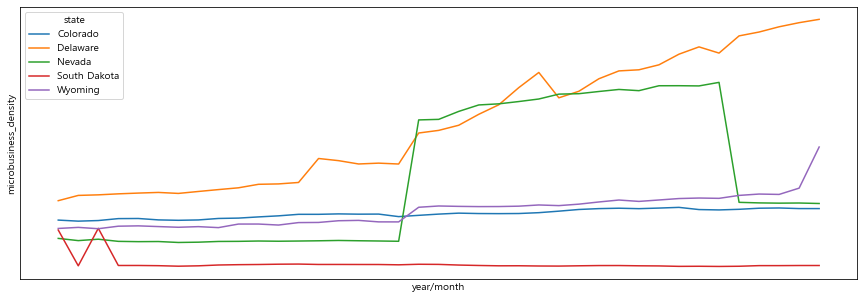

In [154]:
plt.figure(figsize = (15, 5))
sns.lineplot(x = 'year/month', y = 'microbusiness_density', 
             data = train_df[train_df['state'].isin(sort_std[-5:])],
             hue = 'state', ci = None)
plt.xticks([], [])
plt.yticks([], [])
locs, labels = plt.xticks()
plt.setp(labels, rotation = 45)
plt.show()


In [89]:
sort_std[-10:-5]

Index(['Maryland', 'Florida', 'Utah', 'Oregon', 'Idaho'], dtype='object', name='state')

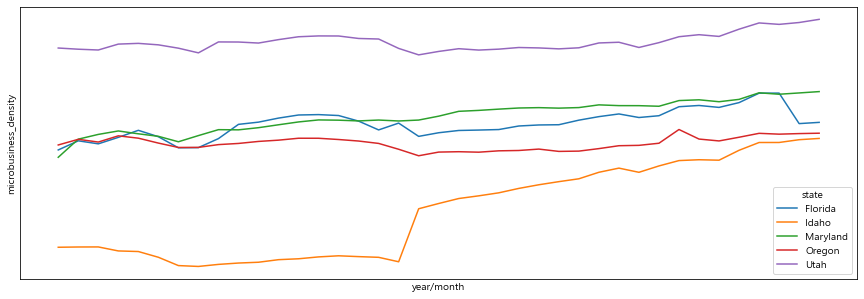

In [155]:
plt.figure(figsize = (15, 5))
sns.lineplot(x = 'year/month', y = 'microbusiness_density', 
             data = train_df[train_df['state'].isin(sort_std[-10:-5])],
             hue = 'state', ci = None)
locs, labels = plt.xticks()
plt.setp(labels, rotation = 45)

plt.show()


### 같은 주 안의 county끼리는 비슷한 특징을 가지는가?

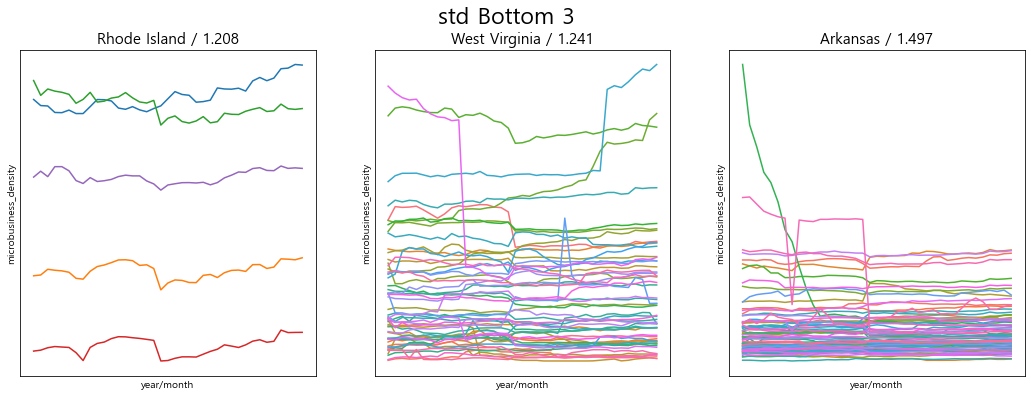

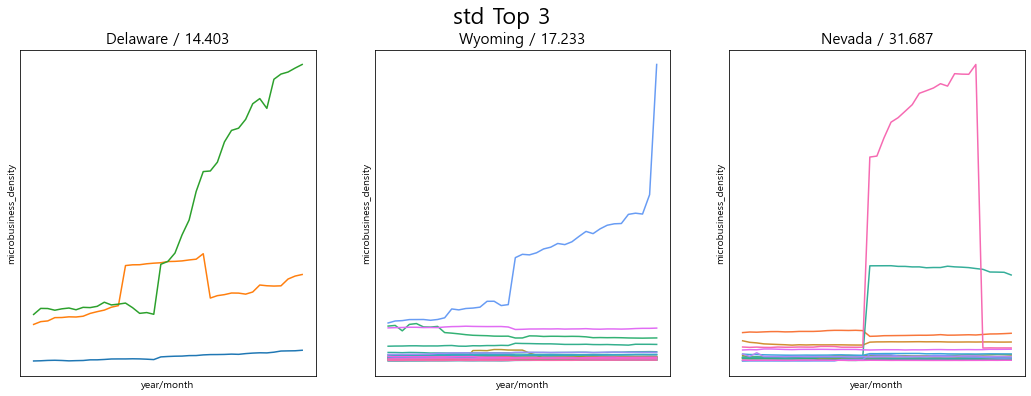

In [182]:
def county_in_the_same_state(state, legend = False) :
    sns.lineplot(data = train_df[train_df['state'] == state],
                 x = 'year/month', y = 'microbusiness_density',
                 hue = 'county', legend = legend)
    locs, labels = plt.xticks()
    plt.setp(labels, rotation=45)
    plt.title(f"{state} / {np.round(each_state['std'][state], 3)}", fontsize = 15)
    plt.xticks([], [])
    plt.yticks([], [])


plt.figure(figsize = (18, 6))
plt.suptitle('std Bottom 3', fontsize = 23, va = 'top')
fig.tight_layout()
for i in range(3) : 
    plt.subplot(1, 3, i+1)
    county_in_the_same_state(sort_std[[1,2,3][i]], False)
    
plt.figure(figsize = (18, 6))
plt.suptitle('std Top 3 \n', fontsize = 23, va = 'top')
fig.tight_layout()
for i in range(3) : 
    plt.subplot(1, 3, i+1)
    county_in_the_same_state(sort_std[[-3, -2, -1][i]], False)

분산이 작은 경우는 state 내의 county들도 일정한 패턴을 보이거나, 변동이 생겨도 대부분의 county들이 같은 패턴을 보이는 것을 알 수 있음 

**What happens if we remove the two counties with the highest standard deviation in Nevada?**

In [184]:
large_std_list

[32017, 32510]

[32017, 32510]

In [200]:
large_std_counties = train_df[train_df['state'] == 'Nevada'].\
groupby('cfips')['microbusiness_density'].std().sort_values().index[-2:].tolist()
print(f'largest std counties : {large_std_counties}')

largest std counties : [32017, 32510]


In [201]:
train_df[(train_df['state'] == 'Nevada') & (train_df['cfips'].isin(large_std_counties))]

,row_id,cfips,county,state,first_day_of_month,microbusiness_density,active,year,month,year/month
68328,32017_2019-08-01,32017,Lincoln County,Nevada,2019-08-01,4.026528,170,2019,8,201908
68329,32017_2019-09-01,32017,Lincoln County,Nevada,2019-09-01,3.789673,160,2019,9,201909
68330,32017_2019-10-01,32017,Lincoln County,Nevada,2019-10-01,4.168641,176,2019,10,201910
68331,32017_2019-11-01,32017,Lincoln County,Nevada,2019-11-01,3.908100,165,2019,11,201911
68332,32017_2019-12-01,32017,Lincoln County,Nevada,2019-12-01,4.026528,170,2019,12,201912
...,...,...,...,...,...,...,...,...,...,...
68674,32510_2022-06-01,32510,Carson City,Nevada,2022-06-01,10.847511,4769,2022,6,202206
68675,32510_2022-07-01,32510,Carson City,Nevada,2022-07-01,10.981712,4828,2022,7,202207
68676,32510_2022-08-01,32510,Carson City,Nevada,2022-08-01,10.915750,4799,2022,8,202208
68677,32510_2022-09-01,32510,Carson City,Nevada,2022-09-01,10.936220,4808,2022,9,202209


In [207]:
print('original std is : ',train_df[(train_df['state'] == 'Nevada') ]['microbusiness_density'].std())
print('top2 removed std is : ',train_df[(train_df['state'] == 'Nevada') & (~train_df['cfips'].isin(large_std_counties))]['microbusiness_density'].std())

original std is :  31.687018255741442
top2 removed std is :  5.5332509584395355


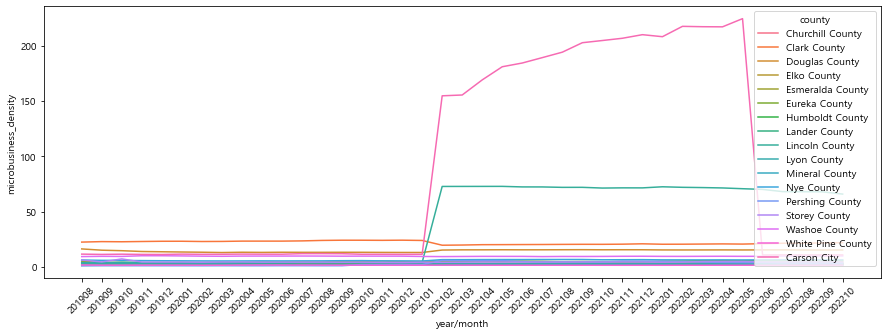

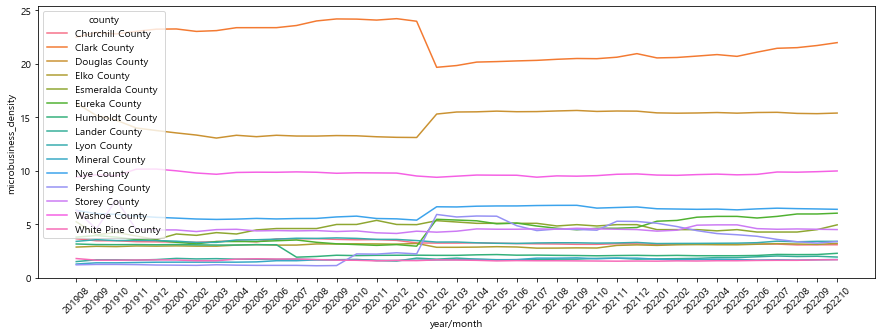

In [211]:
plt.figure(figsize=(15, 5))
sns.lineplot(data = train_df[(train_df['state']=='Nevada')],
             x = 'year/month', y = 'microbusiness_density', hue = 'county')
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.show()

plt.figure(figsize=(15, 5))
sns.lineplot(data = train_df[(train_df['state']=='Nevada')&(~train_df['cfips'].isin(large_std_list))],
             x = 'year/month', y = 'microbusiness_density', hue = 'county')
locs, labels = plt.xticks()
plt.setp(labels, rotation=45)
plt.show()

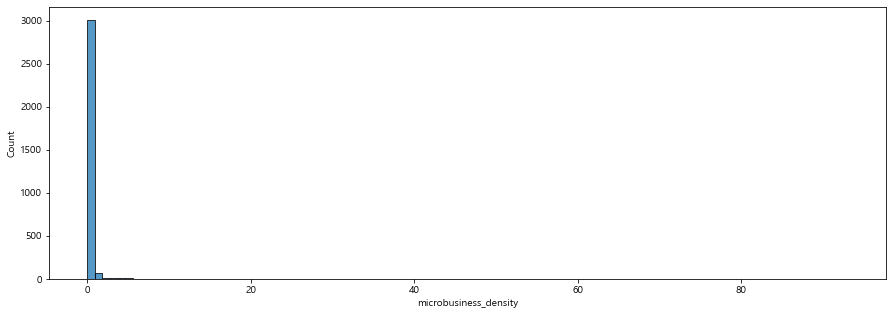

In [210]:
plt.figure(figsize=(15, 5))
sns.histplot(data=train_df.groupby('cfips').std(),x='microbusiness_density',bins=100)
plt.show()

In [212]:
train_df[train_df['microbusiness_density'] > 20]

,row_id,cfips,county,state,first_day_of_month,microbusiness_density,active,year,month,year/month
2769,2060_2019-08-01,2060,Bristol Bay Borough,Alaska,2019-08-01,23.022598,163,2019,8,201908
7956,6041_2019-08-01,6041,Marin County,California,2019-08-01,20.285410,42133,2019,8,201908
7957,6041_2019-09-01,6041,Marin County,California,2019-09-01,20.176119,41906,2019,9,201909
7958,6041_2019-10-01,6041,Marin County,California,2019-10-01,20.191525,41938,2019,10,201910
7959,6041_2019-11-01,6041,Marin County,California,2019-11-01,20.269522,42100,2019,11,201911
...,...,...,...,...,...,...,...,...,...,...
122143,56039_2022-06-01,56039,Teton County,Wyoming,2022-06-01,25.652266,4916,2022,6,202206
122144,56039_2022-07-01,56039,Teton County,Wyoming,2022-07-01,25.939260,4971,2022,7,202207
122145,56039_2022-08-01,56039,Teton County,Wyoming,2022-08-01,26.085369,4999,2022,8,202208
122146,56039_2022-09-01,56039,Teton County,Wyoming,2022-09-01,26.090586,5000,2022,9,202209
